In [268]:
conda install -c conda-forge category_encoders

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - category_encoders


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.7.5                |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge
  conda                                           pkgs/main --> conda-forge




certifi-2019.3.9     | 149 KB    |            |   0% 
certifi-2019.3.9     | 149 KB    | ########## | 100% 

conda-4.7.5          | 3.0 MB    |            |   0% 
conda-4.7.5    

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


In [253]:
import pandas as pd
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split


geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries = 3)


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
df = pd.read_csv('EtsySoldOrdersLatLong.csv')
df.head(2)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Number of Items,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Shipping,Sales Tax,Order Total,Status,Card Processing Fees,Order Net,Adjusted Order Total,Adjusted Card Processing Fees,Adjusted Net Order Amount,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin,pred_State
0,2012-12-31,75244054,coolJeans,Jamie Favela Le,Jamie Favela Le,0,1,Credit Card,2013-01-01,13608 chestnut street,0,Whittier,CA,90605,United States,USD,5.0,0.0,0.0,0.0,0.0,1.99,0.0,6.99,0.0,0.46,6.53,0.0,0.0,0.0,Jamie Favela Le,online,online_cc,0.0,0.0,"13608 chestnut street ,Whittier,CA,90605","13608, Chestnut Street, South Whittier, East W...","(33.9588002499197, -118.031060013306, 0.0)",33.958800,-118.031060,"United States, $1.99",12,"(29.899, 40.379]","(-150.197, -117.624]",True
1,2012-12-30,75137098,alexanderhack,Alexander Hack,Alexander,Hack,2,Credit Card,2012-12-30,8805 Grand Ridge Ct.,0,louisville,KY,40214,United States,USD,30.0,0.0,0.0,0.0,0.0,8.00,0.0,38.00,0.0,1.39,36.61,0.0,0.0,0.0,Alexander Hack,online,online_cc,0.0,0.0,"8805 Grand Ridge Ct.,louisville,KY,40214","8805, Grand Ridge Court, Louisville, Jefferson...","(38.143548, -85.7965936443034, 0.0)",38.143548,-85.796594,"United States, $8.0",12,"(29.899, 40.379]","(-117.624, -85.374]",False


In [252]:
df['LatLong'] = df['LatLong'].apply(lambda loc: tuple(loc.point) if loc else None)

AttributeError: 'str' object has no attribute 'point'

In [249]:
import numpy as np
# df['Lat'].tolist
# latlong = df['Lat'].apply(pd.Series)
# latlong.head(2)

lat = []
lon = []

# For each row in a varible,
for row in df['Lat']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon
df['latitude'] = df['latitude'].str.replace('(', '')
df['countryandshipping'] = df['Ship Country'] + ', $' + df['Shipping'].astype(str)
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Date Shipped'] = pd.to_datetime(df['Date Shipped'])
df.head(2)

ValueError: Length of values does not match length of index

In [357]:
df = df.drop(columns = 'pred_State')

In [358]:
df.to_csv('EtsySoldOrdersLatLong.csv', index=False)
df = pd.read_csv('EtsySoldOrdersLatLong.csv')
df.head(2)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Number of Items,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Shipping,Sales Tax,Order Total,Status,Card Processing Fees,Order Net,Adjusted Order Total,Adjusted Card Processing Fees,Adjusted Net Order Amount,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin
0,2012-12-31,75244054,coolJeans,Jamie Favela Le,Jamie Favela Le,0,1,Credit Card,2013-01-01,13608 chestnut street,0,Whittier,CA,90605,United States,USD,5.0,0.0,0.0,0.0,0.0,1.99,0.0,6.99,0.0,0.46,6.53,0.0,0.0,0.0,Jamie Favela Le,online,online_cc,0.0,0.0,"13608 chestnut street ,Whittier,CA,90605","13608, Chestnut Street, South Whittier, East W...","(33.9588002499197, -118.031060013306, 0.0)",33.958800,-118.031060,"United States, $1.99",12,"(29.899, 40.379]","(-150.197, -117.624]"
1,2012-12-30,75137098,alexanderhack,Alexander Hack,Alexander,Hack,2,Credit Card,2012-12-30,8805 Grand Ridge Ct.,0,louisville,KY,40214,United States,USD,30.0,0.0,0.0,0.0,0.0,8.00,0.0,38.00,0.0,1.39,36.61,0.0,0.0,0.0,Alexander Hack,online,online_cc,0.0,0.0,"8805 Grand Ridge Ct.,louisville,KY,40214","8805, Grand Ridge Court, Louisville, Jefferson...","(38.143548, -85.7965936443034, 0.0)",38.143548,-85.796594,"United States, $8.0",12,"(29.899, 40.379]","(-117.624, -85.374]"


In [230]:
df['Month Sale'] = pd.DatetimeIndex(df['Sale Date']).month

In [354]:
import plotly.graph_objs as go
import plotly.plotly as py

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

data = [go.Scattergeo(
    lat = df['latitude'],
    lon = df['longitude'],
    text = df['Buyer'].astype(str),
    marker = dict(
        color = df['Month Sale'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 4,        
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "last",
#             ticksuffix = " inches",
            dtick = 1
        )                
    )
)]

layout = dict(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'Etsy Sales by Month',
)

fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='EtsySales1')

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [232]:
df['Payment Type'].value_counts(normalize = True)

online_cc       0.680056
online_pp       0.317125
online_other    0.002114
online_check    0.000705
Name: Payment Type, dtype: float64

In [233]:

data = [go.Scattergeo(
    lat = df['latitude'],
    lon = df['longitude'],
    text = df['countryandshipping'],
    marker = dict(
        color = df['Shipping'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 4,        
        colorbar = dict(
            title='Shipping Price in USD',
            thickness = 10,
            titleside = "right",
            tickvals = [0, 5, 10, 15, 20, 25],
            tickmode = 'array',
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "last",
            ticksuffix = " USD",
#             dtick = 5
        )                
    )
)]

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
#         resolution = 50,
#         projection = dict(
#             type = 'conic conformal',
#             rotation = dict(
#                 lon = -100
#             )
#         ),
#         lonaxis = dict(
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ -140.0, -55.0 ],
#             dtick = 5
#         ),
#         lataxis = dict (
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ 20.0, 60.0 ],
#             dtick = 5
#         )
    ),
    title = 'Etsy Shipping Costs',
)

fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='EtsySalesbyCountry')

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [234]:
pay = pd.DataFrame(df['Payment Type'].value_counts(normalize = True))
pay = pay.reset_index()
pay

,index,Payment Type
0,online_cc,0.680056
1,online_pp,0.317125
2,online_other,0.002114
3,online_check,0.000705


In [235]:
# data preparation
pie1 = pay['Payment Type']
pie1_list = pay['Payment Type'] # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = ['Credit Card','Paypal','Other','Check']
# figure

fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "textfont": dict(size=20),
      "hole": .3,
      "type": "pie",
      "marker":dict(colors = ['rgba(255, 128, 255, 0.8)','rgba(255, 255, 128, 0.5)'])
    },],
  "layout": {
        "title":"The Different Payment Types for Fetus Soap on Etsy",
    }
}
py.iplot(fig)

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [254]:
import plotly.graph_objs as go

import pandas as pd
from datetime import datetime

data = [go.Scatter(x=df['Sale Date'], y=df['Number of Items'])]

py.iplot(data, filename = 'time-series-simple')

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [237]:
df['Ship State'].value_counts(normalize = True)

CA                       0.113460
NY                       0.079634
FL                       0.060606
TX                       0.059197
PA                       0.040169
IL                       0.029598
WA                       0.026779
0                        0.023961
MN                       0.022551
WI                       0.021846
VA                       0.021846
GA                       0.020437
OH                       0.020437
NC                       0.019027
MA                       0.018323
NJ                       0.018323
Victoria                 0.018323
CO                       0.017618
ON                       0.017618
MO                       0.016913
MD                       0.016913
LA                       0.015504
NSW                      0.015504
MI                       0.014799
OR                       0.012685
CT                       0.011980
AZ                       0.011980
TN                       0.011980
BC                       0.010571
SC            

In [290]:
df = df.fillna(0)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [240]:
import numpy as np

df['latitude_bin'] = pd.cut(df['latitude'], bins=10)#put latitude into 10 bins
df['longitude_bin'] = pd.cut(df['longitude'], bins=10)
# df['pred_State'] = df['Ship State'] == 'CA'
df.head(2)

TypeError: '<=' not supported between instances of 'str' and 'float'

In [241]:
table = df.pivot_table(index = 'latitude_bin',
                       columns = 'longitude_bin',
                       aggfunc = 'mean')

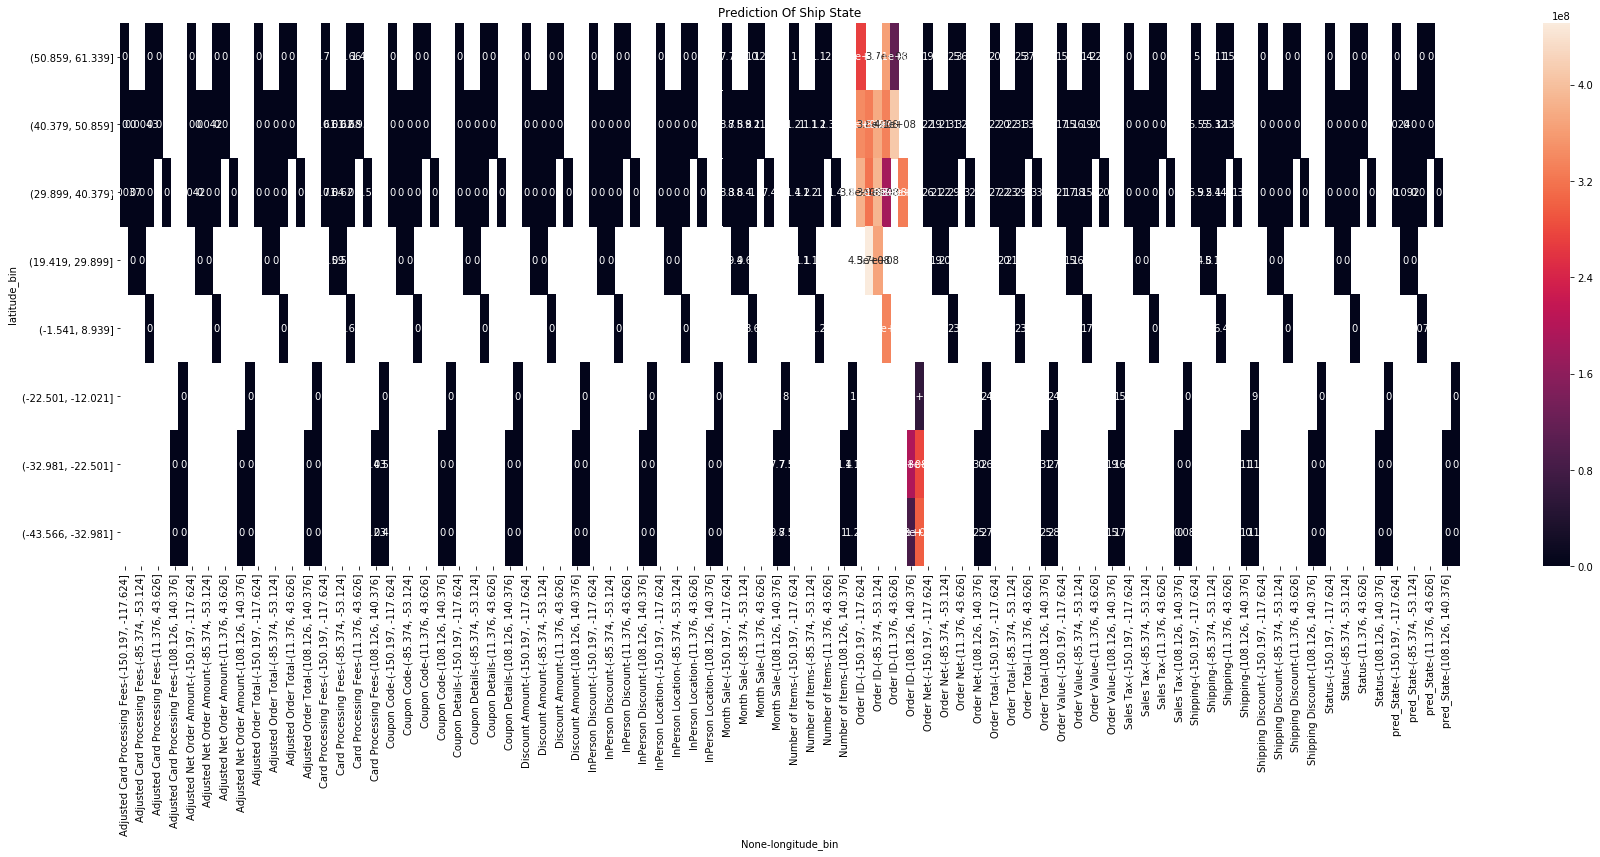

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 10))
plt.title('Prediction Of Ship State')
sns.heatmap(table[::-1], annot=True);

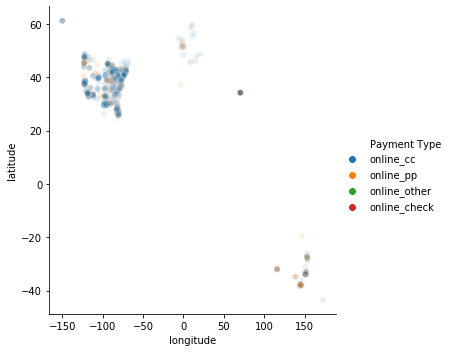

In [264]:
sns.relplot(x='longitude', y='latitude', hue='Payment Type', 
            data=df, alpha=0.1);

In [355]:
df['Number of Items'].value_counts(normalize = True)
#87 percent of the time, only one item was ordered

1     0.872445
2     0.102185
3     0.014799
4     0.004933
5     0.002114
6     0.001409
15    0.000705
10    0.000705
8     0.000705
Name: Number of Items, dtype: float64

In [244]:
df['Sale Date'][:1]

0   2012-12-31
Name: Sale Date, dtype: datetime64[ns]

In [334]:
train = df[(df['Sale Date'] > '2012-5-1') & (df['Sale Date'] < '2015-5-1')]
test = df[(df['Sale Date'] > '2015-5-1')]
train.shape, test.shape, df.shape

((804, 45), (138, 45), (1419, 45))

In [335]:
df.head(2)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Number of Items,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Shipping,Sales Tax,Order Total,Status,Card Processing Fees,Order Net,Adjusted Order Total,Adjusted Card Processing Fees,Adjusted Net Order Amount,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin,pred_State
0,2012-12-31,75244054,coolJeans,Jamie Favela Le,Jamie Favela Le,0,1,Credit Card,2013-01-01,13608 chestnut street,0,Whittier,CA,90605,United States,USD,5.0,0.0,0.0,0.0,0.0,1.99,0.0,6.99,0.0,0.46,6.53,0.0,0.0,0.0,Jamie Favela Le,online,online_cc,0.0,0.0,"13608 chestnut street ,Whittier,CA,90605","13608, Chestnut Street, South Whittier, East W...","(33.9588002499197, -118.031060013306, 0.0)",33.958800,-118.031060,"United States, $1.99",12,"(29.899, 40.379]","(-150.197, -117.624]",True
1,2012-12-30,75137098,alexanderhack,Alexander Hack,Alexander,Hack,2,Credit Card,2012-12-30,8805 Grand Ridge Ct.,0,louisville,KY,40214,United States,USD,30.0,0.0,0.0,0.0,0.0,8.00,0.0,38.00,0.0,1.39,36.61,0.0,0.0,0.0,Alexander Hack,online,online_cc,0.0,0.0,"8805 Grand Ridge Ct.,louisville,KY,40214","8805, Grand Ridge Court, Louisville, Jefferson...","(38.143548, -85.7965936443034, 0.0)",38.143548,-85.796594,"United States, $8.0",12,"(29.899, 40.379]","(-117.624, -85.374]",False


In [336]:
target = 'Number of Items'
features = df.columns.drop([target, 'Card Processing Fees', 'Order Net', 'Adjusted Order Total', 'Adjusted Card Processing Fees', 'Adjusted Net Order Amount', 'Shipping'])
features

Index(['Sale Date', 'Order ID', 'Buyer User ID', 'Full Name', 'First Name',
       'Last Name', 'Payment Method', 'Date Shipped', 'Street 1', 'Street 2',
       'Ship City', 'Ship State', 'Ship Zipcode', 'Ship Country', 'Currency',
       'Order Value', 'Coupon Code', 'Coupon Details', 'Discount Amount',
       'Shipping Discount', 'Sales Tax', 'Order Total', 'Status', 'Buyer',
       'Order Type', 'Payment Type', 'InPerson Discount', 'InPerson Location',
       'FullAddress', 'LatLong', 'Lat', 'latitude', 'longitude',
       'countryandshipping', 'Month Sale', 'latitude_bin', 'longitude_bin',
       'pred_State'],
      dtype='object')

In [337]:
from sklearn.model_selection import train_test_split

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state=42)

In [338]:
#Predicting the probability of future orders based on existing customer demographic

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

import category_encoders as ce

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_features': uniform(),
    'randomforestregressor__min_samples_leaf': [1, 10, 100]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', ...ors='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'randomforestregressor__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A022D2EF28>, 'randomforestregressor__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A022EC5C18>, 'randomforestregressor__min_samples_leaf': [1, 10, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='

In [339]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation RMSLE', np.sqrt(-search.best_score_))

Best hyperparameters {'randomforestregressor__max_features': 0.9050497402520616, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__n_estimators': 328}
Cross-validation RMSLE 0.16034472828138943


In [340]:
from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(random_state=42)
)

param_distributions = {
    'xgbregressor__n_estimators': randint(500, 1000),
    'xgbregressor__max_depth': randint(3, 7)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
C:\Users\lilyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'xgbregressor__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A022D2E358>, 'xgbregressor__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A0233D7550>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=10)

In [341]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation RMSLE', np.sqrt(-search.best_score_))

Best hyperparameters {'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 968}
Cross-validation RMSLE 0.15445413877087752


In [342]:
results_df = pd.DataFrame(search.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.683499,0.016500,0.039505,0.004501,3,968,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",-0.029953,-0.017740,-0.023856,0.006107,1,-9.376121e-08,-3.992733e-08,-6.684427e-08,2.691694e-08
1,0.693500,0.027503,0.040997,0.005002,6,916,"{'xgbregressor__max_depth': 6, 'xgbregressor__...",-0.364487,-0.017684,-0.191355,0.173401,3,-6.627609e-08,-2.821256e-08,-4.724432e-08,1.903177e-08
2,0.661491,0.000510,0.048000,0.012002,5,880,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",-0.364487,-0.017702,-0.191364,0.173392,4,-6.598930e-08,-6.392477e-08,-6.495703e-08,1.032267e-09
3,0.598985,0.022006,0.042005,0.006001,3,851,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",-0.029953,-0.017740,-0.023856,0.006107,2,-9.386999e-08,-3.999408e-08,-6.693204e-08,2.693795e-08
4,0.389501,0.006505,0.024495,0.000506,4,925,"{'xgbregressor__max_depth': 4, 'xgbregressor__...",-0.367110,-0.017813,-0.192733,0.174649,5,-6.402415e-08,-1.339566e-07,-9.899035e-08,3.496620e-08


In [343]:
results_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.683499,0.016500,0.039505,0.004501,3,968,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",-0.029953,-0.017740,-0.023856,0.006107,1,-9.376121e-08,-3.992733e-08,-6.684427e-08,2.691694e-08
3,0.598985,0.022006,0.042005,0.006001,3,851,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",-0.029953,-0.017740,-0.023856,0.006107,2,-9.386999e-08,-3.999408e-08,-6.693204e-08,2.693795e-08
1,0.693500,0.027503,0.040997,0.005002,6,916,"{'xgbregressor__max_depth': 6, 'xgbregressor__...",-0.364487,-0.017684,-0.191355,0.173401,3,-6.627609e-08,-2.821256e-08,-4.724432e-08,1.903177e-08
2,0.661491,0.000510,0.048000,0.012002,5,880,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",-0.364487,-0.017702,-0.191364,0.173392,4,-6.598930e-08,-6.392477e-08,-6.495703e-08,1.032267e-09
4,0.389501,0.006505,0.024495,0.000506,4,925,"{'xgbregressor__max_depth': 4, 'xgbregressor__...",-0.367110,-0.017813,-0.192733,0.174649,5,-6.402415e-08,-1.339566e-07,-9.899035e-08,3.496620e-08


In [344]:
# numeric_features = df.select_dtypes(include='number').columns.tolist()

# X_train = train[numeric_features]
# y_train = train[target]
# X_test = test[numeric_features]
# y_test = test[target]

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size = 0.2, random_state=42)

encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

In [345]:
X_train.head(2)

,Sale Date,Order ID,Buyer User ID,Full Name,First Name,Last Name,Payment Method,Date Shipped,Street 1,Street 2,Ship City,Ship State,Ship Zipcode,Ship Country,Currency,Order Value,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Sales Tax,Order Total,Status,Buyer,Order Type,Payment Type,InPerson Discount,InPerson Location,FullAddress,LatLong,Lat,latitude,longitude,countryandshipping,Month Sale,latitude_bin,longitude_bin,pred_State
821,1,176987652,1,1,1,1,1,1,1,1,1,1,1,1,1,15.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,1,1,1,0.0,0.0,1,1,1,41.282652,-73.503992,1,12,1,1,False
827,2,176688129,2,2,2,2,1,2,2,1,2,2,2,1,1,30.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,2,1,1,0.0,0.0,2,2,2,0.000000,0.000000,2,12,2,2,False


R^2 Score 0.9346171560972624


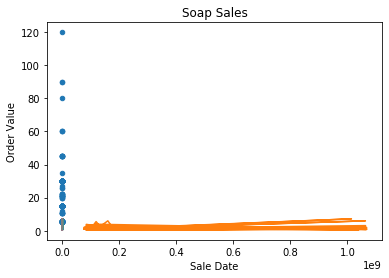

In [351]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train, y_train)
print('R^2 Score', lr.score(X_train, y_train))
ax = X_train.plot('Sale Date', 'Order Value', kind='scatter', title='Soap Sales')
ax.plot(X_train, lr.predict(X_train));